In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
################################# Required packages ############################
# To work with dataframes
import pandas as pd 

# To perform numerical operations
import numpy as np

# To draw graphs
import matplotlib.pyplot as plt

# To visualize data
import seaborn as sns

# importing the library of KNN
from sklearn.neighbors import KNeighborsClassifier  

# To partition the data
from sklearn.model_selection import train_test_split

# Importing performance metrics - accuracy score & confusion matrix
from sklearn import metrics

# To generate ROC curve
from sklearn.metrics import roc_curve

# To calculate AUC score
from sklearn.metrics import roc_auc_score

# importing library of binary classifier
import statsmodels.api as sm

# To calculate confusion matrix
from sklearn.metrics import confusion_matrix

# Complete sklearn
import sklearn

# Gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

# LinearDiscriminant analysis classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Support vector machine classifier
from sklearn import svm

# To perform mathematical operations
import math

# To findout correlation
from scipy.stats import kendalltau

# binary classifier
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# path
dataset_path = "/content/drive/MyDrive/arsenic_analysis/"

# Reading data
gba_df = pd.read_csv(dataset_path + "GBA_summary.csv")

#**** To check variables' data type
#print(df.info())

#**** Check for missing values.            
gba_df.isnull()          

#**** How many rows contain missing values? 
#print('Data columns with null values:\n', df.isnull().sum())

gba_df_copy1 = gba_df.copy()

# Storing the column names 
columns_list=list(gba_df_copy1.columns)
print(columns_list)

print(gba_df_copy1.head(15))
print('Shape of new dataframe (lda_df_copy1): ', gba_df_copy1.shape, type(gba_df_copy1))

['Average_gba', 'y_test_gba', 'y_pred_prob_gba', 'y_predicted_gba']
    Average_gba  y_test_gba  y_pred_prob_gba  y_predicted_gba
0          1.52           1            0.803                0
1          0.82           0            0.852                0
2          1.63           0            1.000                0
3          0.46           0            0.999                0
4          0.47           0            0.991                0
5          1.59           0            0.956                0
6          1.61           1            0.297                1
7          0.46           0            0.989                0
8          1.52           0            0.992                0
9          0.47           0            0.946                0
10         1.00           0            0.999                0
11         1.48           0            0.464                1
12         1.63           0            0.994                0
13         0.47           1            0.010                1
14

In [4]:
# Reading data
lda_df = pd.read_csv(dataset_path + "LDA_summary.csv")

#**** To check variables' data type
#print(df.info())

#**** Check for missing values.            
lda_df.isnull()          

#**** How many rows contain missing values? 
#print('Data columns with null values:\n', df.isnull().sum())

lda_df_copy1 = lda_df.copy()

# Storing the column names 
columns_list=list(lda_df_copy1.columns)
print(columns_list)

print(lda_df_copy1.head(15))
print('Shape of new dataframe (lda_df_copy1): ', lda_df_copy1.shape, type(lda_df_copy1))

['Average_lda', 'y_test_lda', 'y_pred_prob_lda', 'y_predicted_lda']
    Average_lda  y_test_lda  y_pred_prob_lda  y_predicted_lda
0          1.52           1            0.731                0
1          0.82           0            0.564                0
2          1.63           0            0.701                0
3          0.46           0            0.793                0
4          0.47           0            0.492                1
5          1.59           0            0.721                0
6          1.61           1            0.715                0
7          0.46           0            0.607                0
8          1.52           0            0.690                0
9          0.47           0            0.508                0
10         1.00           0            0.871                0
11         1.48           0            0.686                0
12         1.63           0            0.749                0
13         0.47           1            0.619                0
14

In [6]:
# Reading data
svm_df = pd.read_csv(dataset_path + "SVM_summary.csv")

#**** To check variables' data type
#print(df.info())

#**** Check for missing values.            
svm_df.isnull()          

#**** How many rows contain missing values? 
#print('Data columns with null values:\n', df.isnull().sum())

svm_df_copy1 = svm_df.copy()

# Storing the column names 
columns_list=list(svm_df_copy1.columns)
print(columns_list)

print(svm_df_copy1.head(15))
print('Shape of new dataframe (svm_df_copy1): ', svm_df_copy1.shape, type(svm_df_copy1))

['Average_svm', 'y_test_svm', 'y_pred_prob_svm', 'y_predicted_svm']
    Average_svm  y_test_svm  y_pred_prob_svm  y_predicted_svm
0          1.52           1            0.869                0
1          0.82           0            0.745                0
2          1.63           0            0.440                1
3          0.46           0            0.799                0
4          0.47           0            0.801                0
5          1.59           0            0.799                0
6          1.61           1            0.661                0
7          0.46           0            0.810                0
8          1.52           0            0.971                0
9          0.47           0            0.586                0
10         1.00           0            0.771                0
11         1.48           0            0.392                1
12         1.63           0            0.669                0
13         0.47           1            0.172                1
14

In [7]:
data = [gba_df_copy1["Average_gba"], gba_df_copy1["y_test_gba"], gba_df_copy1["y_pred_prob_gba"], gba_df_copy1["y_predicted_gba"],
        lda_df_copy1["Average_lda"], lda_df_copy1["y_test_lda"], lda_df_copy1["y_pred_prob_lda"], lda_df_copy1["y_predicted_lda"],
        svm_df_copy1["Average_svm"], svm_df_copy1["y_test_svm"], svm_df_copy1["y_pred_prob_svm"], svm_df_copy1["y_predicted_svm"]]

headers = ["Average_gba", "y_test_gba", "y_pred_prob_gba", "y_predicted_gba",
           "Average_lda", "y_test_lda", "y_pred_prob_lda", "y_predicted_lda",
           "Average_svm", "y_test_svm", "y_pred_prob_svm", "y_predicted_svm"]

df_ensemble = pd.concat(data, axis=1, keys=headers)

df_ensemble['y_pred_prob0'] = 0.5* df_ensemble['y_pred_prob_gba'] + 0.16 * df_ensemble['y_pred_prob_lda'] + 0.33 * df_ensemble['y_pred_prob_svm']
df_ensemble['y_pred_prob1'] = 1 - df_ensemble['y_pred_prob0']

for i in range(len(df_ensemble)) :
  if (df_ensemble.loc[i, 'y_pred_prob1'] > 0.5):
    df_ensemble.loc[i, "y_pred1"] = 1
  else:
    df_ensemble.loc[i, "y_pred1"] = 0

print(df_ensemble[["y_test_gba", "y_pred_prob_gba", "y_pred_prob_lda", "y_pred_prob_svm","y_pred_prob0","y_pred_prob1","y_pred1"]])
#print(df_ensemble[["y_test_gba", "y_test_lda", "y_test_svm"]])

      y_test_gba  y_pred_prob_gba  ...  y_pred_prob1  y_pred1
0              1            0.803  ...       0.19477      0.0
1              0            0.852  ...       0.23791      0.0
2              0            1.000  ...       0.24264      0.0
3              0            0.999  ...       0.10995      0.0
4              0            0.991  ...       0.16145      0.0
...          ...              ...  ...           ...      ...
3445           1            0.250  ...       0.70254      1.0
3446           0            1.000  ...       0.10036      0.0
3447           0            0.995  ...       0.10247      0.0
3448           1            0.134  ...       0.62038      1.0
3449           1            0.050  ...       0.79239      1.0

[3450 rows x 7 columns]


In [8]:
# Confusion matrix
# Ci,j is equal to the number of observations known to be in group  and predicted to be in group j.
###############################################
#               Pred+(0)     Pred-(1)
# Actual+(0)    TN           FP       TActual+(0)
# Actual-(1)    FN*          TP       TActual-(1)
#               TPred+       TPred-
#
# FN = falsely predicted negative
# FP = falsely predicted positive
# 0 is negative, 1 is positive
###############################################

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

y_test = df_ensemble["y_test_gba"]
y_predicted = df_ensemble["y_pred1"]

cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

# Calculating the accuracy
acc_score = metrics.accuracy_score(y_test, y_predicted)
print("Accuracy: ", round(acc_score, 3))
print("Precision: ", round(metrics.precision_score(y_test, y_predicted), 3))
print("Sensitivity or recall using function:", round(metrics.recall_score(y_test, y_predicted), 3))

# sensitivity = TP/(TP + FN)
sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity or recall using confusion matrix: ', round(sensitivity, 3))

# specificity = TN/(TN + FP)
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity using confusion matrix: ', round(specificity, 3))

# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (y_test != y_predicted).sum())

[[2064  262]
 [ 458  666]]
Accuracy:  0.791
Precision:  0.718
Sensitivity or recall using function: 0.593
Sensitivity or recall using confusion matrix:  0.593
Specificity using confusion matrix:  0.887
Misclassified samples: 720


[[0.80523 0.19477]
 [0.76209 0.23791]
 [0.75736 0.24264]
 ...
 [0.89753 0.10247]
 [0.37962 0.62038]
 [0.20761 0.79239]]
AUC score for Ensemble classifier:  0.84


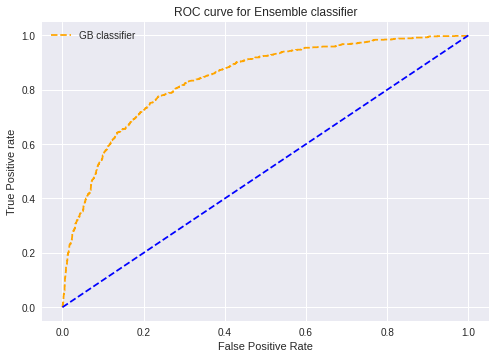

y_predicted_at_cutoffs: [[1, 0.805, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0.762, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0.757, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0.89, 0.0, 0, 0, 0, 

In [10]:
# =============================================================================
# ROC curve
# =============================================================================

y_pred_prob = df_ensemble[["y_pred_prob0", "y_pred_prob1"]].to_numpy()

print(y_pred_prob)

fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score = roc_auc_score(y_test, y_pred_prob[:,1])
print('AUC score for Ensemble classifier: ', round(auc_score, 3))

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='GB classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve for Ensemble classifier')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig(dataset_path + 'ROC_Esemble_classifier', dpi=300)
plt.show();

# =============================================================================
# Specificity, sensitivity, and accuracy curve
# =============================================================================

numbers = [float(x)/100 for x in range(100)]
#print(numbers)
y_predicted_at_cutoffs = []

#x = np.array(y_pred_prob)
#print('Unique probabilities:', np.unique(x))

for irow in range(len(y_pred_prob)):
  v = [y_test[irow], round(y_pred_prob[irow,0], 3), y_predicted[irow]] # adding 'Average' only as a reference across models
  for cutof_prob in numbers:
    if (y_pred_prob[irow, 0] > cutof_prob): # non-arsenic
      v.append(0)
    else:
      v.append(1)
  y_predicted_at_cutoffs.append(v)

print("y_predicted_at_cutoffs:", y_predicted_at_cutoffs)

# How many 0 and 1 using cuttof of 0.5?
class0, class1 = 0, 0
for irow in range(len(y_pred_prob)):
  if (y_pred_prob[irow,0] > 0.5):
    class0 += 1
  else:
    class1 += 1
print("Verification check: At 0.5 cutoff, predicted Class0 (No Arsenic): " + str(class0) + " Class1 (Arsenic):" + str(class1))

#print(pred_prob_y)
print(y_predicted)


Verification step: i, Specificity/Senstivity/Accuracy/Cohen Kappa: 0.5 0.887 0.593 0.791 0.503
Intersection point: i, Specificity/Senstivity/Accuracy/Cohen Kappa: 0.7 0.772 0.762 0.768 0.503


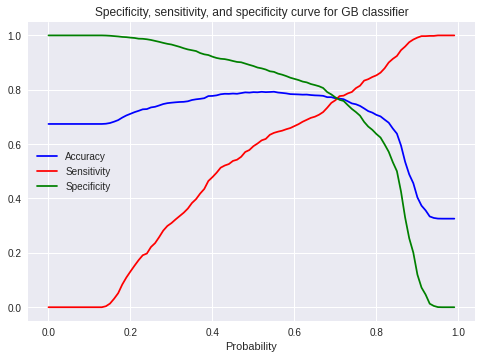

      Probability  Accuracy  Sensitivity  Specificity  Kohen cappa
0.50         0.50  0.791304     0.592527     0.887360     0.502529
0.51         0.51  0.790725     0.602313     0.881771     0.504013
0.52         0.52  0.792464     0.613879     0.878762     0.510478
0.53         0.53  0.791304     0.619217     0.874463     0.509612
0.54         0.54  0.791884     0.634342     0.868014     0.514660
0.55         0.55  0.792754     0.641459     0.865864     0.518163
0.56         0.56  0.789855     0.645907     0.859415     0.513707
0.57         0.57  0.788406     0.649466     0.855546     0.511836
0.58         0.58  0.786667     0.654804     0.850387     0.509880
0.59         0.59  0.784058     0.659253     0.844368     0.506064
0.60         0.60  0.783478     0.666370     0.840069     0.506788
0.61         0.61  0.782899     0.673488     0.835770     0.507507
0.62         0.62  0.782029     0.682384     0.830181     0.508126
0.63         0.63  0.782319     0.689502     0.827171     0.51

In [12]:
y_predicted_at_cutoffs_df = pd.DataFrame(y_predicted_at_cutoffs, columns = ['y_test','y_pred_prob','y_predicted'] + numbers)
#print(y_predicted_at_cutoffs_df)

cutoff_df = pd.DataFrame(columns = ['Probability','Accuracy','Sensitivity','Specificity', 'Kohen cappa'])

for icols in numbers:
    cm1 = metrics.confusion_matrix(y_predicted_at_cutoffs_df['y_test'], y_predicted_at_cutoffs_df[icols])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    kohen_cappa = metrics.cohen_kappa_score(y_predicted_at_cutoffs_df['y_test'], y_predicted_at_cutoffs_df[icols])
    cutoff_df.loc[icols] =[icols, accuracy, sensitivity, specificity, kohen_cappa]
    
    # calculate the cutoff, and the accuracy, senstivity,and specificity at the cutoff.    
    if (icols == 0.70):
      print('Intersection point: i, Specificity/Senstivity/Accuracy/Cohen Kappa:', icols, round(specificity, 3), round(sensitivity, 3), 
            round(accuracy, 3), round(kohen_cappa, 3))
    if (icols == 0.5):
      print('Verification step: i, Specificity/Senstivity/Accuracy/Cohen Kappa:', icols, round(specificity, 3), round(sensitivity, 3), 
            round(accuracy, 3), round(kohen_cappa, 3))

# gca stands for 'get current axis'
plt.title('Specificity, sensitivity, and specificity curve for GB classifier')

ax = plt.gca()

cutoff_df.plot(kind='line',x='Probability',y='Accuracy', color='blue', ax=ax)
cutoff_df.plot(kind='line',x='Probability',y='Sensitivity', color='red', ax=ax)
cutoff_df.plot(kind='line',x='Probability',y='Specificity', color='green', ax=ax)

plt.savefig(dataset_path + 'SAS_Ensemble_classifier', dpi=300)
plt.show()

print(cutoff_df.iloc[50:80,:])